#### Written by Gabriel Borges Pinheiro
[Github](github.com/gabrielbopi)

In [1]:
import numpy as np
#import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def db(X):
    return 10 * np.log10(X)

In [3]:
def inv_db(X):
    return 10**(X/10)

In [4]:
def randn_nlos(beta, snr0):
    """
    Computes the NLoS
    """
    #g: function that depends of the angle between the BS's and UE's antennas. In this algorithm is just a random number
    k = 2
    sigma = 1/snr0
    g = np.random.randn(k) + 1j*np.random.randn(k)
    h = (np.sqrt(1/2))*g
    h[1] *= np.sqrt(beta)
    a = (np.abs(h[0])**2)/(np.abs(h[1])**2 + sigma)
    SE0LoS = np.log2(1+a)
    return SE0LoS


In [5]:
def SE_mean(beta, snr0, mc):
    samples_SE = []
    for i in range(mc):
        samples_SE = np.append(samples_SE, randn_nlos(beta, snr0))
    return np.mean(samples_SE)

In [6]:
#SE0LoS:
def LoS_SE(beta, snr0):
    SE0LoS = np.log2(1+1/(beta+1/snr0))
    return SE0LoS

In [7]:
beta_db = np.array([-30 ,-10])
snr_db = {'min': -10 , 'max':30}
mc = 300
n = 30

In [8]:
SNR0_db = np.linspace(snr_db['min'], snr_db['max'], num=n)
SNR0 = inv_db(SNR0_db)

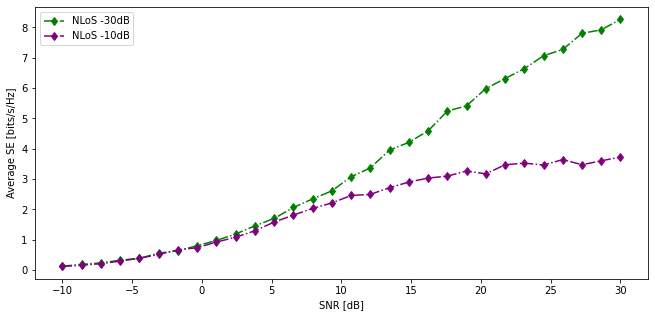

In [9]:
color = ['green','purple']
c = 0
fig, ax = plt.subplots(figsize = (11,5))
ax.set_ylabel("Average SE [bits/s/Hz]")
ax.set_xlabel("SNR [dB]")

for b in beta_db:
    SE = np.array([])
    label = 'NLoS {}dB'.format(b)
    for i in SNR0:
        SE = np.append(SE, SE_mean(inv_db(b), i, mc)) 
    ax.plot(SNR0_db, SE, label = label, linestyle = '-.',marker = 'd', color = color[c])
    c += 1
ax.legend()

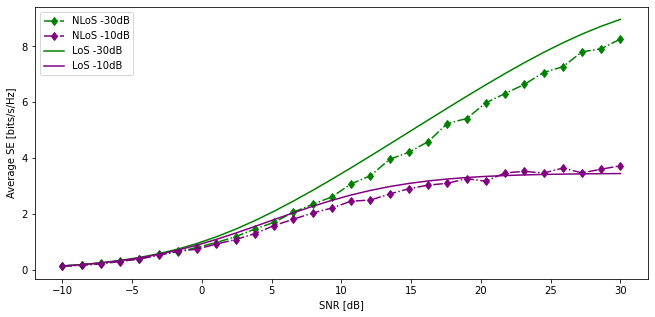

In [10]:
c = 0
for b in beta_db:
    SE = np.array([])
    label = 'LoS {}dB'.format(b)
    for i in SNR0:
        SE = np.append(SE, LoS_SE(inv_db(b), i)) 
    ax.plot(SNR0_db, SE, label = label, color = color[c])
    c += 1
ax.legend()
fig